Premissas: Estados sem nome - considerar MS. Preço do frete não pode ser maior que o preço do produto

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head(10)


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604
7,39780,Internet,B,2023-04-29,352.080,352.080,Acessorios e Inovacoes,BA,9098
8,75525,Mobile,B,2023-02-19,679.200,695.120,Moveis,SP,3442
9,82755,APP,B,2023-02-09,179.928,179.928,Beleza e Saude,SP,7026


In [ ]:
vendas.info() #estados e preço incompletos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace("APP","Aplicativo")
vendas.groupby('idcanalvenda').idcompra.nunique() #como canal venda tem app e aplicativo, precisa substituir

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas.groupby('bandeira').idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [ ]:
vendas.groupby('Nome_Departamento').idcompra.nunique()
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(" ","_")
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [ ]:
vendas.groupby('estado').idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

tratamento de nulos

In [ ]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
#Substituição de valores para o estado

vendas['estado'].fillna("MS", inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
#substituição do preço: nesse caso, vamos usar a média de todos od prosutos como referêmnncia

media_preco = vendas['Preço'].mean()
vendas['Preço'].fillna(media_preco, inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Análise exploratória

In [ ]:
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto =vendas.query("Preço <= Preço_com_frete")

vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,79888.000000,79888.000000,79888.000000,79888.000000
mean,251006.932831,905.450941,910.367219,13932.167009
std,144233.055210,1056.303339,1058.507787,8065.827020
min,0.000000,6.320000,6.320000,1.000000
25%,126877.500000,144.320000,151.128000,6916.000000
50%,251770.000000,531.240000,535.200000,13932.000000
75%,375871.250000,1199.200000,1219.120000,20915.000000
max,723410.000000,14439.240000,14439.240000,27982.000000


In [ ]:
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending =False)

Nome_Departamento
Telefones_e_Celulares     14464
Eletrodomesticos          10466
Eletroportateis            9530
TVs_e_Acessorios           5319
Informatica                5273
Beleza_e_Saude             4605
Bebes                      4503
Moveis                     4155
Utilidades_Domesticas      3702
Acessorios_e_Inovacoes     3535
Audio                      1786
Tablets                    1763
Brinquedos                 1304
Ferramentas                1105
Ar_e_Ventilacao             948
Automotivo                  890
Games                       763
Produtos_de_Limpeza         712
Perfumaria                  618
Esporte_e_Lazer             528
Casa_e_Construcao           263
Cama,_Mesa_e_Banho          153
Decoracao                   134
Relogios                    134
Malas_e_Mochilas            113
Linha_Industrial             86
Pet_Shop                     43
Cine_e_Foto                  11
TV_e_Video                    5
Moda                          3
Alimentos             

In [ ]:
agg_depart_frete =round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

In [ ]:
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending = False) #agrupamento por datas

Data
2023-02-13    767
2023-03-14    734
2023-01-20    727
2023-02-10    722
2023-03-07    720
             ... 
2023-01-11    619
2023-03-01    613
2023-04-04    611
2023-01-03    607
2023-03-28    600
Name: idcompra, Length: 119, dtype: int64

In [ ]:
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742,3


In [ ]:
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending = False)

mes
3    18982
4    18297
1    18159
2    17332
Name: idcompra, dtype: int64

In [ ]:
#nova base

cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
# ambas bases possuem a cliente_log

cliente[['idade','renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
cliente.info() #verificação de nulos e tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
#transformar renda em float
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
vendas_cliente = vendas_correto.merge(cliente, how = 'left', on = "cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,53,11717.0
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0


In [ ]:
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")['renda'].agg('mean').reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8239.52
1,Internet,8236.37
2,Mobile,8233.43


In [ ]:
agg_idade_bandeira = vendas_cliente.groupby("bandeira")['idade'].agg('mean').reset_index()
agg_idade_bandeira

,bandeira,idade
0,A,53.448492
1,B,53.387319


Transformando em visualizações

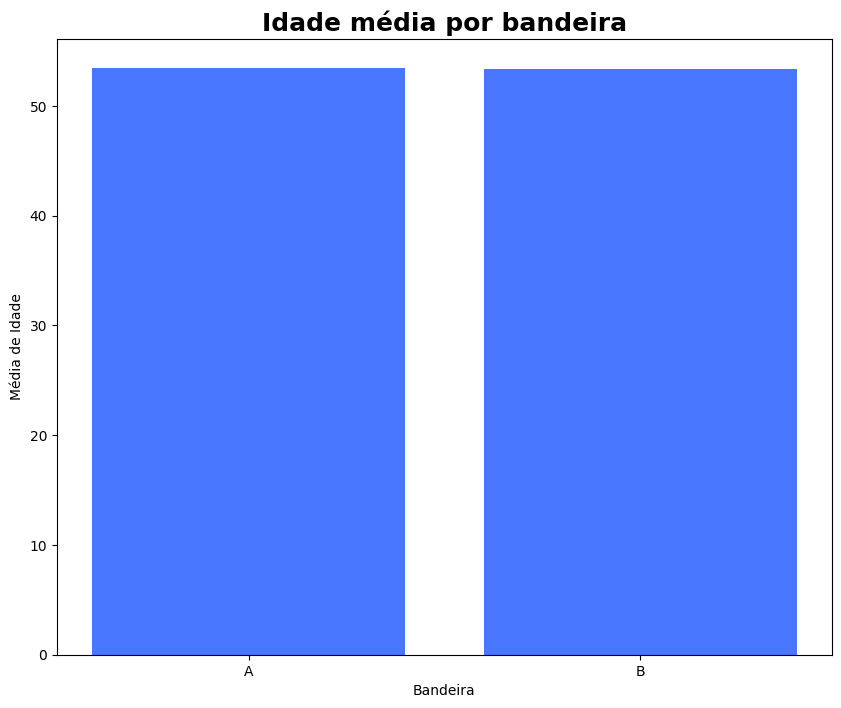

In [ ]:
fig = plt.figure(figsize=(10,8)) #tamanho do gráfico
plt.bar(agg_idade_bandeira['bandeira'],agg_idade_bandeira['idade'], color = '#4876FF'
)
plt.ylabel('Média de Idade')
plt.xlabel('Bandeira')
plt.title('Idade média por bandeira', loc = 'center', fontsize = 18, fontweight ='bold', color = 'black');


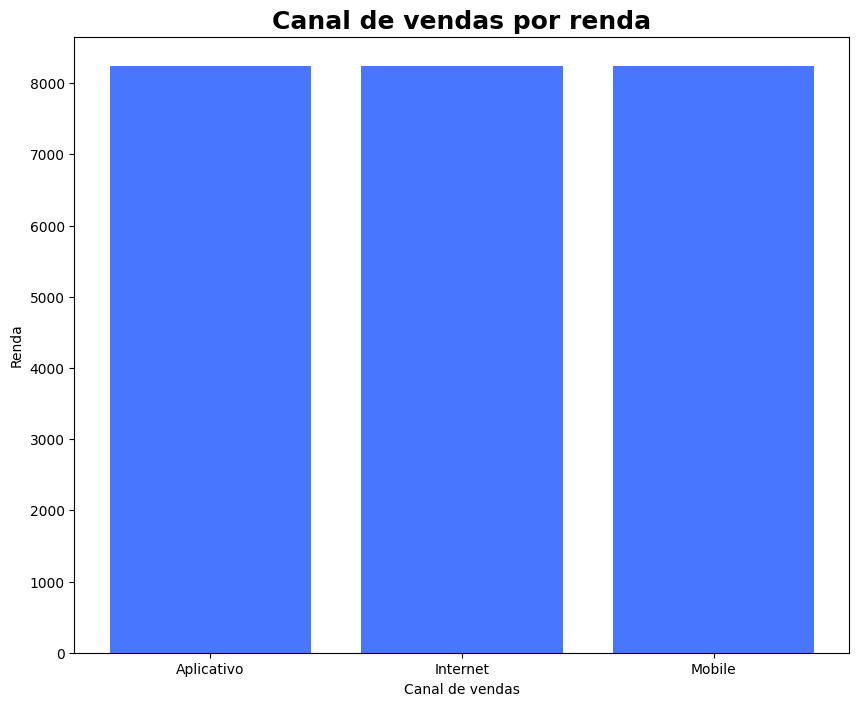

In [ ]:
fig = plt.figure(figsize = (10,8))
plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color = '#4876FF')
plt.ylabel('Renda')
plt.xlabel('Canal de vendas')
plt.title('Canal de vendas por renda', loc = 'center', fontsize = 18, fontweight ='bold', color = 'black');

In [ ]:
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,665
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,669
4,2023-01-06,673
...,...,...
114,2023-04-26,696
115,2023-04-27,711
116,2023-04-28,651
117,2023-04-29,682


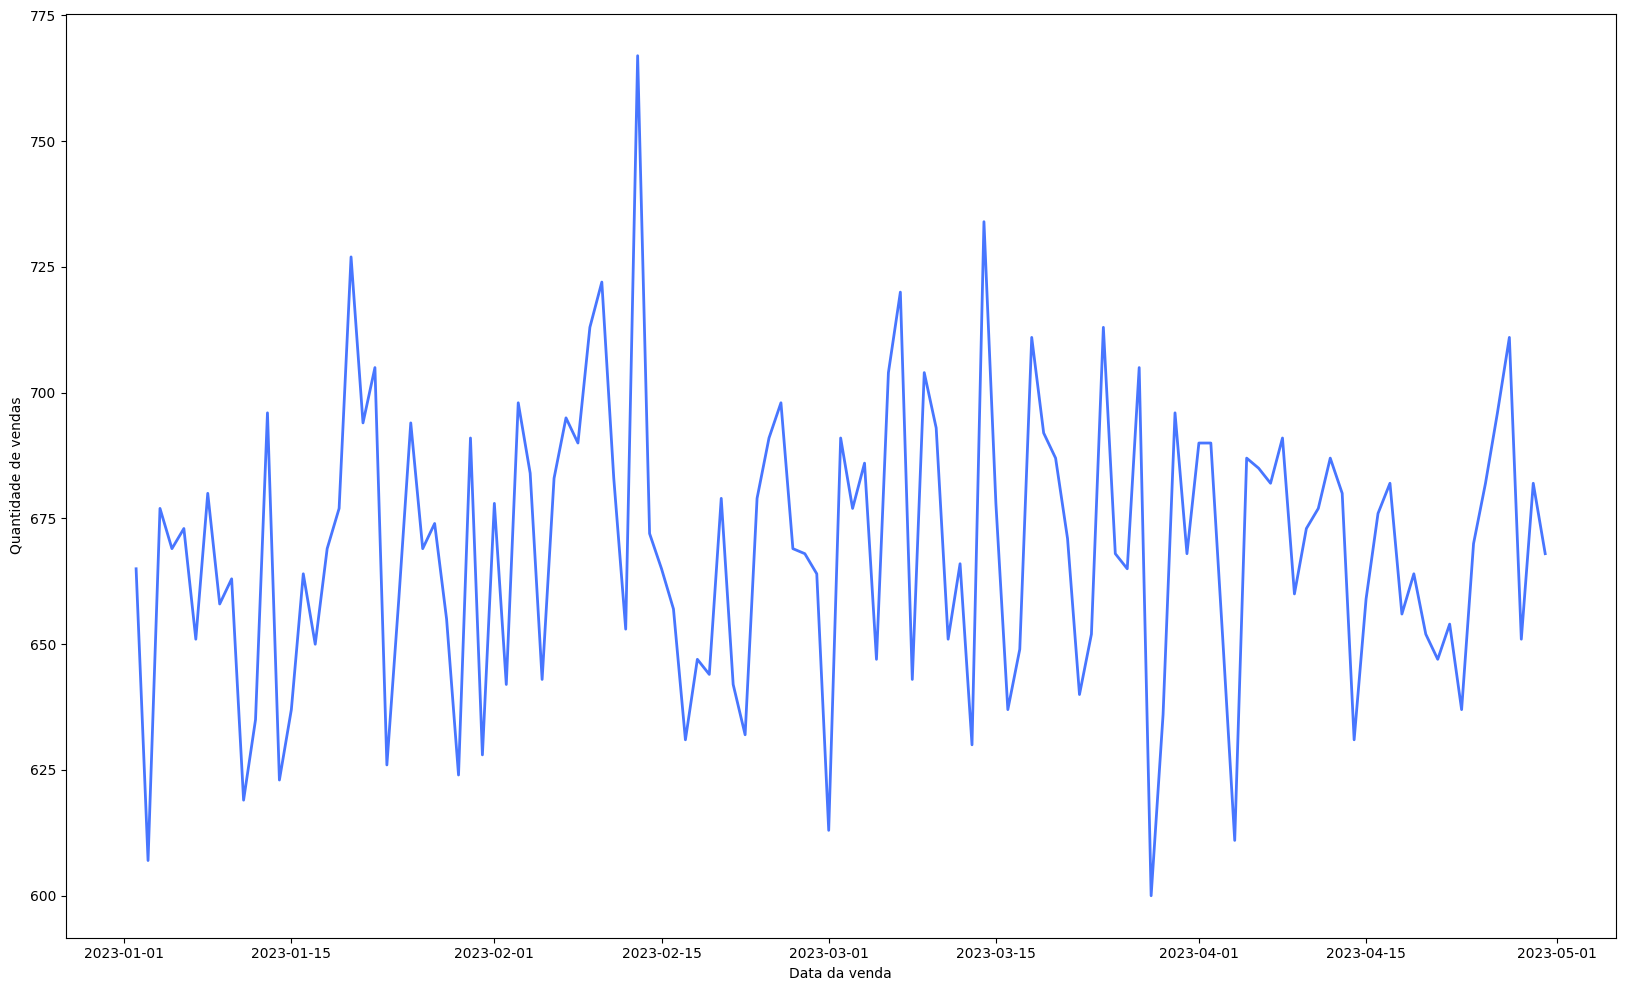

In [ ]:
plt.figure(figsize = (20,12))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = venda_por_data["Data"]
y = venda_por_data['idcompra']
plt.plot(x,y, color = '#4876FF', linewidth = '2')
plt.show()

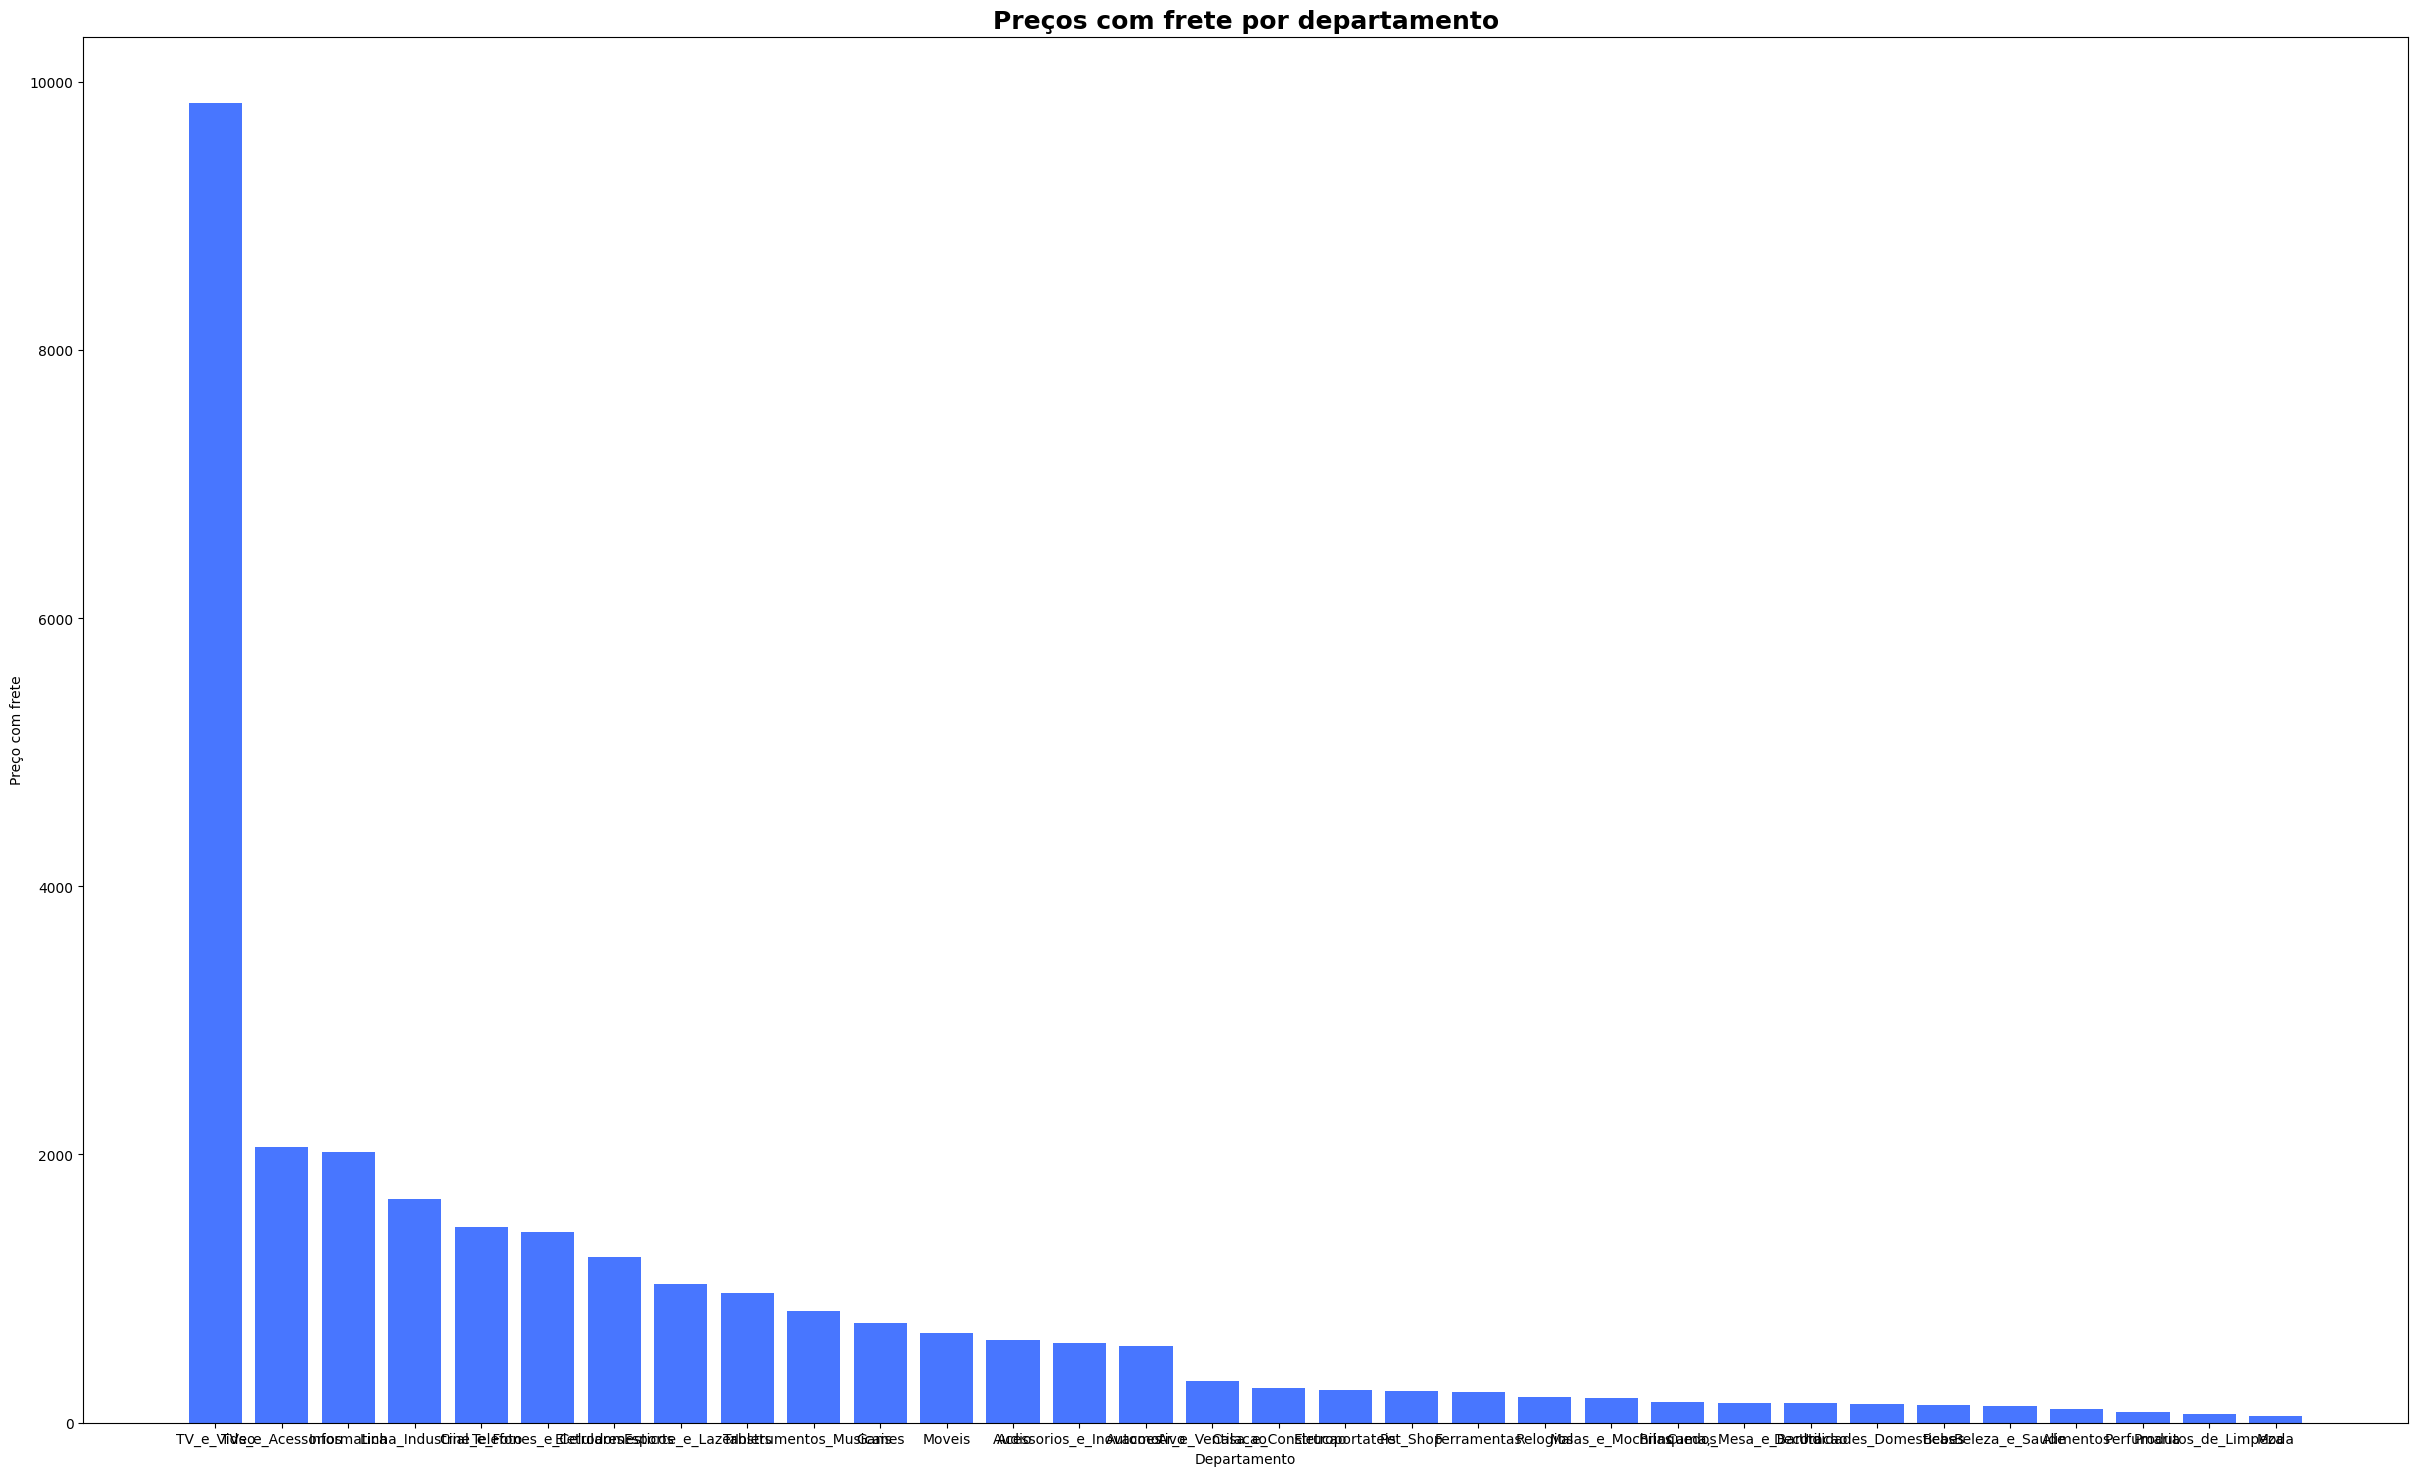

In [ ]:
plt.figure(figsize = (30,18))
plt.bar(agg_depart_frete['Nome_Departamento'], agg_depart_frete['Preço_com_frete'], color = '#4876FF')
plt.xlabel("Departamento")
plt.ylabel("Preço com frete")
plt.title('Preços com frete por departamento', loc = 'center', fontsize = 18, fontweight ='bold', color = 'black');

In [ ]:
px.bar(agg_idade_bandeira, x = 'bandeira', y ='idade')

In [ ]:
px.line(venda_por_data, x = 'Data', y = 'idcompra')

In [ ]:
px.bar(agg_depart_frete, x = 'Nome_Departamento', y = 'Preço_com_frete')